<a href="https://colab.research.google.com/github/jmcava/jmcava/blob/main/Zona_296_dep_estadual_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!head -n 1 votacao_local_votacao-zona_2022_sp_296.csv

aa_eleicao;cd_tipo_eleicao;nm_tipo_eleicao;cd_eleicao;ds_eleicao;dt_eleicao;sg_uf;cd_municipio;nm_municipio;nr_zona;nm_local_votacao;ds_local_votacao_endereco;nr_turno;ds_cargo;nr_votavel;nm_votavel;sq_candidato;qt_aptos;qt_comparecimento;qt_abstencoes;qt_votos_nominais;qt_votos;dt_carga;qt_registros


In [ ]:
import pandas as pd

try:
  colunas = pd.read_csv("votacao_local_votacao-zona_2022_sp_296.csv", nrows=0, encoding='latin-1').columns #  Teste diferentes codificações aqui
  print(colunas)
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Index(['aa_eleicao;cd_tipo_eleicao;nm_tipo_eleicao;cd_eleicao;ds_eleicao;dt_eleicao;sg_uf;cd_municipio;nm_municipio;nr_zona;nm_local_votacao;ds_local_votacao_endereco;nr_turno;ds_cargo;nr_votavel;nm_votavel;sq_candidato;qt_aptos;qt_comparecimento;qt_abstencoes;qt_votos_nominais;qt_votos;dt_carga;qt_registros'], dtype='object')


In [ ]:
import pandas as pd
import chardet

# 1. Detectar a codificação
with open("/content/votacao_local_votacao-zona_2022_sp_296.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# 2. Ler o CSV com a codificação detectada, separador correto e tratamento de erros
try:
    df_296 = pd.read_csv("/content/votacao_local_votacao-zona_2022_sp_296.csv", encoding=result['encoding'], sep=";", on_bad_lines='skip')
except Exception as e:
    print(f"Erro ao ler o CSV: {e}")
    # Trate o erro aqui, se necessário

# 3. Filtrar para Deputados Estaduais (ds_cargo)
df_dep_estaduais_296 = df_296[df_296['ds_cargo'] == 'DEPUTADO ESTADUAL']

# 4. Agregar os votos por candidato (nm_votavel)
df_agregado = df_dep_estaduais_296.groupby('nm_votavel')['qt_votos'].sum().reset_index()

# 5. Ordenar por votos decrescentes
df_ordenado = df_agregado.sort_values('qt_votos', ascending=False)

# 6. Obter os 94 primeiros (deputados eleitos - assumindo que são 94)
deputados_eleitos = df_ordenado.head(94)

# 7. Imprimir o resultado
print(deputados_eleitos)

# (Opcional) Salvar em um arquivo CSV
deputados_eleitos.to_csv("deputados_estaduais_eleitos_zona_296.csv", index=False, encoding='utf-8')

Empty DataFrame
Columns: [nm_votavel, qt_votos]
Index: []


In [ ]:
print(df_296.head())

   aa_eleicao  cd_tipo_eleicao    nm_tipo_eleicao  cd_eleicao  \
0        2022                2  Eleição Ordinária         546   
1        2022                2  Eleição Ordinária         546   
2        2022                2  Eleição Ordinária         546   
3        2022                2  Eleição Ordinária         546   
4        2022                2  Eleição Ordinária         546   

                       ds_eleicao           dt_eleicao sg_uf  cd_municipio  \
0  Eleições Gerais Estaduais 2022  2022-10-02 00:00:00    SP         70750   
1  Eleições Gerais Estaduais 2022  2022-10-02 00:00:00    SP         70750   
2  Eleições Gerais Estaduais 2022  2022-10-02 00:00:00    SP         70750   
3  Eleições Gerais Estaduais 2022  2022-10-02 00:00:00    SP         70750   
4  Eleições Gerais Estaduais 2022  2022-10-02 00:00:00    SP         70750   

            nm_municipio  nr_zona  ... nr_votavel  \
0  SÃO BERNARDO DO CAMPO      409  ...      45000   
1  SÃO BERNARDO DO CAMPO      414 

In [ ]:
import pandas as pd

try:
  colunas = pd.read_csv("/content/votacao_local_votacao-zona_2022_sp_296.csv", nrows=0, encoding='latin-1').columns #  Teste diferentes codificações aqui
  print(colunas)
except Exception as e:
    print(f"Ocorreu um erro: {e}")

Index(['aa_eleicao;cd_tipo_eleicao;nm_tipo_eleicao;cd_eleicao;ds_eleicao;dt_eleicao;sg_uf;cd_municipio;nm_municipio;nr_zona;nm_local_votacao;ds_local_votacao_endereco;nr_turno;ds_cargo;nr_votavel;nm_votavel;sq_candidato;qt_aptos;qt_comparecimento;qt_abstencoes;qt_votos_nominais;qt_votos;dt_carga;qt_registros'], dtype='object')


In [ ]:
import pandas as pd
import chardet

# 1. Detectar a codificação
with open("/content/votacao_candidato_296.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# 2. Ler o CSV com a codificação detectada e o separador correto
try:
    df_296 = pd.read_csv("/content/votacao_candidato_296.csv", encoding=result['encoding'], sep=";")  # Adicione sep=";"
except Exception as e:
    print(f"Erro ao ler o CSV: {e}")
    # Lide com o erro aqui, se necessário.  Experimente outras codificações se o erro persistir

# Agora você pode verificar as colunas:
print(df_296.columns)


# ... (resto do seu código para processar os dados) ...

Index(['Cargo', 'Situação totalização', 'Zona', 'Nome candidato', 'UF',
       'Município', 'Ano de eleição', 'Votos nominais', 'Data de carga'],
      dtype='object')


In [ ]:
import pandas as pd
import chardet

# ... (código para ler o CSV com a codificação e separador corretos, como na resposta anterior) ...

# 3. Filtrar para Deputados Estaduais (Cargo)
df_dep_estaduais_296 = df_296[df_296['Cargo'] == 'DEPUTADO ESTADUAL']

# 4. Agregar os votos por candidato (Nome candidato)
df_agregado = df_dep_estaduais_296.groupby('Nome candidato')['Votos nominais'].sum().reset_index()

# 5. Ordenar por votos decrescentes
df_ordenado = df_agregado.sort_values('Votos nominais', ascending=False)

# 6. Obter os 94 primeiros (deputados eleitos - assumindo que são 94)
deputados_eleitos = df_ordenado.head(94)

# 7. Imprimir o resultado
print(deputados_eleitos)

# (Opcional) Salvar em um arquivo CSV
deputados_eleitos.to_csv("deputados_estaduais_eleitos_zona_296.csv", index=False, encoding='utf-8')

Empty DataFrame
Columns: [Nome candidato, Votos nominais]
Index: []


In [ ]:
print(df_296['Cargo'].unique())

['Deputado Estadual']


In [ ]:
df_dep_estaduais_296 = df_296[df_296['Cargo'] == 'Deputado Estadual']  # Case-sensitive

In [ ]:
print(df_296['Cargo'].isnull().sum())

0


In [ ]:
df_296 = df_296.dropna(subset=['Cargo'])

In [ ]:
df_dep_estaduais_296 = df_296[df_296['Cargo'].str.contains("Deputado", case=False, na=False)] # Case-insensitive, ignora nulos

In [ ]:
print(df_296.head(100)) # Imprime as primeiras 100 linhas
# ou
print(df_296) # imprime o DataFrame inteiro (se não for muito grande)

In [ ]:
print(df_296.head(100)) # Imprime as primeiras 100 linhas
# ou
print(df_296) # imprime o DataFrame inteiro (se não for muito grande)

                Cargo Situação totalização  Zona  \
0   Deputado Estadual             Suplente   296   
1   Deputado Estadual             Suplente   296   
2   Deputado Estadual             Suplente   296   
3   Deputado Estadual             Suplente   296   
4   Deputado Estadual             Suplente   296   
..                ...                  ...   ...   
95  Deputado Estadual           Não Eleito   296   
96  Deputado Estadual           Não Eleito   296   
97  Deputado Estadual           Não Eleito   296   
98  Deputado Estadual           Não Eleito   296   
99  Deputado Estadual           Não Eleito   296   

                       Nome candidato  UF              Município  \
0   CICERA SEVERINA DA CONCEIÇÃO MUSA  SP  SÃO BERNARDO DO CAMPO   
1                  ALEXANDRA DE ABREU  SP  SÃO BERNARDO DO CAMPO   
2                 RODRIGO BRUNO NAHAS  SP  SÃO BERNARDO DO CAMPO   
3               RODRIGO REY RODRIGUEZ  SP  SÃO BERNARDO DO CAMPO   
4             ALINE CARBALLO TEIXEI

In [ ]:
print(df_296['Cargo'].dtype)

object


Codificação detectada: ISO-8859-1


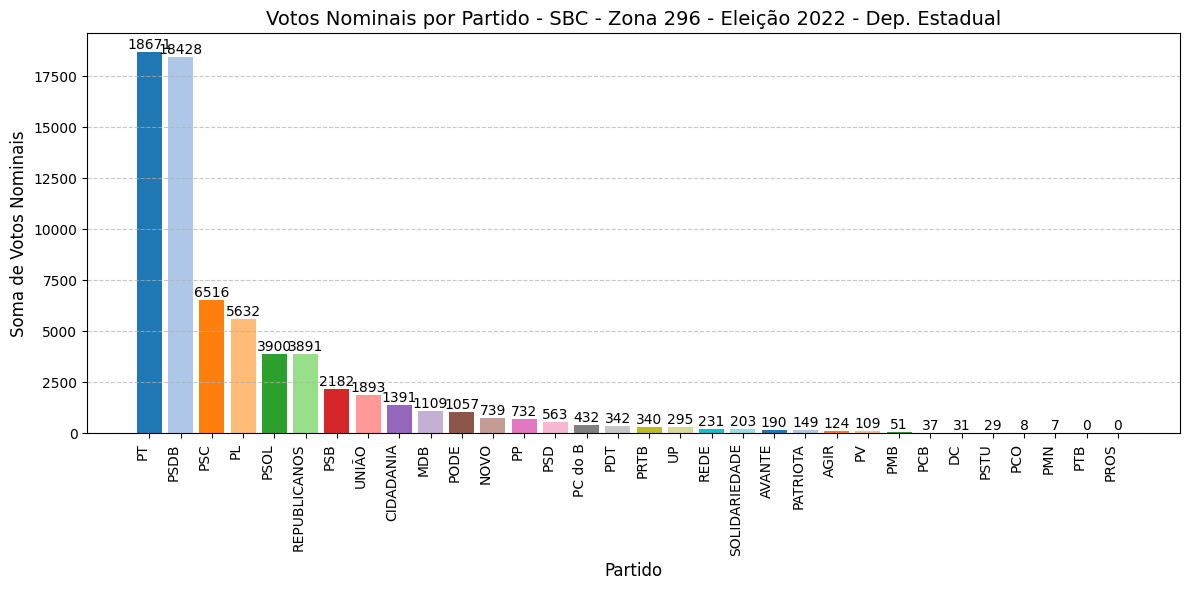

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

# Detecta a codificação
with open("/content/votacao_candidato_296.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

print(f"Codificação detectada: {result['encoding']}")

# Carrega o CSV com a codificação e o separador corretos
df_296 = pd.read_csv("/content/votacao_candidato_296.csv", encoding=result['encoding'], sep=";")

# Agrupa por partido e soma os votos nominais
df_agregado_296 = df_296.groupby('Partido')['Votos nominais'].sum().reset_index()

# Ordena os dados para o gráfico (opcional, mas recomendado)
df_agregado_296 = df_agregado_296.sort_values('Votos nominais', ascending=False)



# Cria o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(df_agregado_296['Partido'], df_agregado_296['Votos nominais'], color=plt.colormaps['tab20'].colors)

plt.xlabel('Partido', fontsize=12)
plt.ylabel('Soma de Votos Nominais', fontsize=12)
plt.title('Votos Nominais por Partido - SBC - Zona 296 - Eleição 2022 - Dep. Estadual', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}', ha='center', va='bottom')


plt.show()

In [ ]:
print(df_296.columns)

Index(['Cargo', 'Situação totalização', 'Zona', 'Nome candidato', 'UF',
       'Município', 'Ano de eleição', 'Votos nominais', 'Data de carga'],
      dtype='object')


In [ ]:
import pandas as pd

# Caminho do arquivo CSV
file_path = '/content/votacao_candidato_296.csv'

# Carregar o arquivo com a codificação adequada e o separador correto
try:
    df = pd.read_csv(file_path, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1', sep=';')

# Exibir as colunas para confirmação
print("Colunas disponíveis no arquivo:")
print(df.columns)

# Filtrar apenas os candidatos eleitos e reeleitos com base na situação de totalização
# Certifique-se de ajustar os valores de acordo com a nomenclatura do seu arquivo
df_eleitos = df[df['Situação totalização'].str.contains('Eleito', case=False, na=False)]

# Selecionar colunas relevantes
df_eleitos = df_eleitos[['Nome candidato', 'Partido','Votos nominais']]

# Ordenar por votos nominais de forma decrescente
df_eleitos_sorted = df_eleitos.sort_values(by='Votos nominais', ascending=False)

# Mostrar os primeiros registros para validação
print(df_eleitos_sorted.head())

# Salvar o resultado em um novo arquivo CSV
df_eleitos_sorted.to_csv('/content/candidatos_eleitos_296.csv', index=False, encoding='utf-8')


Colunas disponíveis no arquivo:
Index(['Cargo', 'Situação totalização', 'Zona', 'Nome candidato', 'UF',
       'Município', 'Ano de eleição', 'Partido', 'Votos nominais',
       'Data de carga'],
      dtype='object')
                       Nome candidato       Partido  Votos nominais
66              CARLA SARDANO MORANDO          PSDB           17966
1681  LUIZ FERNANDO TEIXEIRA FERREIRA            PT            7573
1092       TEONÍLIO MONTEIRO DA COSTA            PT            5132
1432        EDUARDO MATARAZZO SUPLICY            PT            3139
990         ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS            1109


In [ ]:
print(df_eleitos)

                          Nome candidato Partido  Votos nominais
2                 OSEIAS SANTOS DA SILVA     PSD             167
14                       RAQUEL DE PAULA    PSTU               1
15                PAULO BATISTA DOS REIS      PT               8
21                          EDYMAR BUENO      PP               0
23             ROBERTO CARLOS DE ALMEIDA     PTB               0
...                                  ...     ...             ...
1919             ÁKILA SEVERO DE AZEVEDO    PROS               0
1920  ANTONIO LUCIANO DO ROSARIO BARBOSA    PROS               0
1921     MARIA DA GLORIA IBARRA DOS REIS    PROS               0
1922              OSEIAS VIEIRA DE SOUSA    AGIR               1
1923            DOUGLAS SOLANO DAS NEVES    AGIR               0

[784 rows x 3 columns]


In [ ]:
# Verifique os valores únicos na coluna de Situação totalização para identificar o termo correto
print(df['Situação totalização'].unique())

# Ajustar o filtro para incluir apenas candidatos eleitos
df_eleitos_corrigido = df[df['Situação totalização'].isin(['Eleito', 'Eleito por Média', 'Eleito por QP'])]

# Recontar o total de candidatos eleitos
total_eleitos_corrigido = len(df_eleitos_corrigido)
print(f"Total de candidatos eleitos: {total_eleitos_corrigido}")


['Suplente' 'Eleito' 'Não Eleito']
Total de candidatos eleitos: 94


In [ ]:
# Filtrar apenas os candidatos eleitos
df_eleitos = df[df['Situação totalização'] == 'Eleito']

# Selecionar as colunas necessárias e ordená-las
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Exibir as primeiras linhas do resultado
print(df_final.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final.to_csv('/content/candidatos_eleitos_filtrados.csv', index=False, encoding='utf-8')


                      Nome candidato Partido  Votos nominais
2             OSEIAS SANTOS DA SILVA     PSD             167
15            PAULO BATISTA DOS REIS      PT               8
26  GUILHERME DA COSTA AGUIAR CORTEZ    PSOL              92
60         PAULO ALVES CORRÊA JUNIOR     PSD              22
63      OCIMAR DONIZETI LEO OLIVEIRA     MDB               1


In [ ]:
# Filtrar apenas os candidatos eleitos
df_eleitos = df[df['Situação totalização'] == 'Eleito']

# Selecionar as colunas necessárias
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Exibir as primeiras linhas do resultado ordenado
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados.csv', index=False, encoding='utf-8')


                       Nome candidato       Partido  Votos nominais
66              CARLA SARDANO MORANDO          PSDB           17966
1681  LUIZ FERNANDO TEIXEIRA FERREIRA            PT            7573
1092       TEONÍLIO MONTEIRO DA COSTA            PT            5132
1432        EDUARDO MATARAZZO SUPLICY            PT            3139
990         ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS            1109


In [ ]:
# Filtrar os candidatos eleitos e selecionar as colunas necessárias
df_eleitos = df[df['Situação totalização'] == 'Eleito']
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Enumerar os candidatos na ordem, começando pelo número 1
df_final_sorted['Posição'] = range(1, len(df_final_sorted) + 1)

# Exibir as primeiras linhas do resultado com a numeração
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados_com_numeracao.csv', index=False, encoding='utf-8')


                       Nome candidato       Partido  Votos nominais  Posição
66              CARLA SARDANO MORANDO          PSDB           17966        1
1681  LUIZ FERNANDO TEIXEIRA FERREIRA            PT            7573        2
1092       TEONÍLIO MONTEIRO DA COSTA            PT            5132        3
1432        EDUARDO MATARAZZO SUPLICY            PT            3139        4
990         ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS            1109        5


In [ ]:
# Filtrar os candidatos eleitos e selecionar as colunas necessárias
df_eleitos = df[df['Situação totalização'] == 'Eleito']
df_final = df_eleitos[['Nome candidato', 'Partido', 'Votos nominais']]

# Ordenar os candidatos pela coluna 'Votos nominais' de forma decrescente
df_final_sorted = df_final.sort_values(by='Votos nominais', ascending=False)

# Enumerar os candidatos na ordem, começando pelo número 1
df_final_sorted['Posição'] = range(1, len(df_final_sorted) + 1)

# Reorganizar as colunas para garantir que 'Posição' seja a primeira
df_final_sorted = df_final_sorted[['Posição', 'Nome candidato', 'Partido', 'Votos nominais']]

# Exibir as primeiras linhas do resultado com a numeração
print(df_final_sorted.head())

# Salvar o resultado em um novo arquivo CSV, se necessário
df_final_sorted.to_csv('/content/candidatos_eleitos_ordenados_com_numeracao.csv', index=False, encoding='utf-8')


      Posição                   Nome candidato       Partido  Votos nominais
66          1            CARLA SARDANO MORANDO          PSDB           17966
1681        2  LUIZ FERNANDO TEIXEIRA FERREIRA            PT            7573
1092        3       TEONÍLIO MONTEIRO DA COSTA            PT            5132
1432        4        EDUARDO MATARAZZO SUPLICY            PT            3139
990         5        ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS            1109


In [ ]:
# Exibir o índice das linhas do DataFrame final para ver de onde elas vêm
print(df_final_sorted.index)


Index([  66, 1681, 1092, 1432,  990, 1052, 1091, 1636,  191,  502, 1053,  631,
       1899, 1851,  682, 1172, 1334, 1494,  979, 1049,  192,   75,  884, 1485,
        374,  489,  763,  958, 1853,  767,  179,  107,  221, 1635, 1568,  128,
          2, 1822, 1346, 1815, 1180,  700,  995, 1280,   26, 1497, 1673, 1021,
       1042, 1495,  459,  652,  254,  513,  108, 1181, 1787, 1427,  317, 1421,
        971,  917,  847,  250,  822,   60, 1741, 1105,  318, 1559, 1855,  831,
       1174,  677,  311, 1306, 1103,  945,  965,   15,  384, 1886,  471,  894,
       1746, 1293,  710,  781,  309,  732, 1085,  967,   63,  776],
      dtype='int64')


In [ ]:
# Exibir o índice das linhas do DataFrame final para ver de onde elas vêm
print(df_final_sorted.index)


Index([  66, 1681, 1092, 1432,  990, 1052, 1091, 1636,  191,  502, 1053,  631,
       1899, 1851,  682, 1172, 1334, 1494,  979, 1049,  192,   75,  884, 1485,
        374,  489,  763,  958, 1853,  767,  179,  107,  221, 1635, 1568,  128,
          2, 1822, 1346, 1815, 1180,  700,  995, 1280,   26, 1497, 1673, 1021,
       1042, 1495,  459,  652,  254,  513,  108, 1181, 1787, 1427,  317, 1421,
        971,  917,  847,  250,  822,   60, 1741, 1105,  318, 1559, 1855,  831,
       1174,  677,  311, 1306, 1103,  945,  965,   15,  384, 1886,  471,  894,
       1746, 1293,  710,  781,  309,  732, 1085,  967,   63,  776],
      dtype='int64')


In [ ]:
# Exibir o DataFrame sem o índice
print(df_final_sorted.to_string(index=False))


 Posição                         Nome candidato       Partido  Votos nominais
       1                  CARLA SARDANO MORANDO          PSDB           17966
       2        LUIZ FERNANDO TEIXEIRA FERREIRA            PT            7573
       3             TEONÍLIO MONTEIRO DA COSTA            PT            5132
       4              EDUARDO MATARAZZO SUPLICY            PT            3139
       5              ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS            1109
       6                 PAULA NUNES DOS SANTOS          PSOL             925
       7       ANA CAROLINA ROSSI BARRETO SERRA     CIDADANIA             886
       8                CARLOS ALBERTO GIANNASI          PSOL             831
       9                  THIAGO REIS AURICCHIO            PL             812
      10                 BRUNO ZAMBELLI SALGADO            PL             696
      11             EDIANE MARIA DO NASCIMENTO          PSOL             643
      12          AUGUSTO ZACARIAS CORREA LEITE         UNIÃO   

In [ ]:
# Exibir o DataFrame sem o índice
print(df_final_sorted.to_string(index=False))


 Posição                         Nome candidato       Partido  Votos nominais
       1                  CARLA SARDANO MORANDO          PSDB           17966
       2        LUIZ FERNANDO TEIXEIRA FERREIRA            PT            7573
       3             TEONÍLIO MONTEIRO DA COSTA            PT            5132
       4              EDUARDO MATARAZZO SUPLICY            PT            3139
       5              ALTAIR MORAES DE OLIVEIRA  REPUBLICANOS            1109
       6                 PAULA NUNES DOS SANTOS          PSOL             925
       7       ANA CAROLINA ROSSI BARRETO SERRA     CIDADANIA             886
       8                CARLOS ALBERTO GIANNASI          PSOL             831
       9                  THIAGO REIS AURICCHIO            PL             812
      10                 BRUNO ZAMBELLI SALGADO            PL             696
      11             EDIANE MARIA DO NASCIMENTO          PSOL             643
      12          AUGUSTO ZACARIAS CORREA LEITE         UNIÃO   

In [ ]:
!pip install matplotlib

Codificação detectada: ISO-8859-1


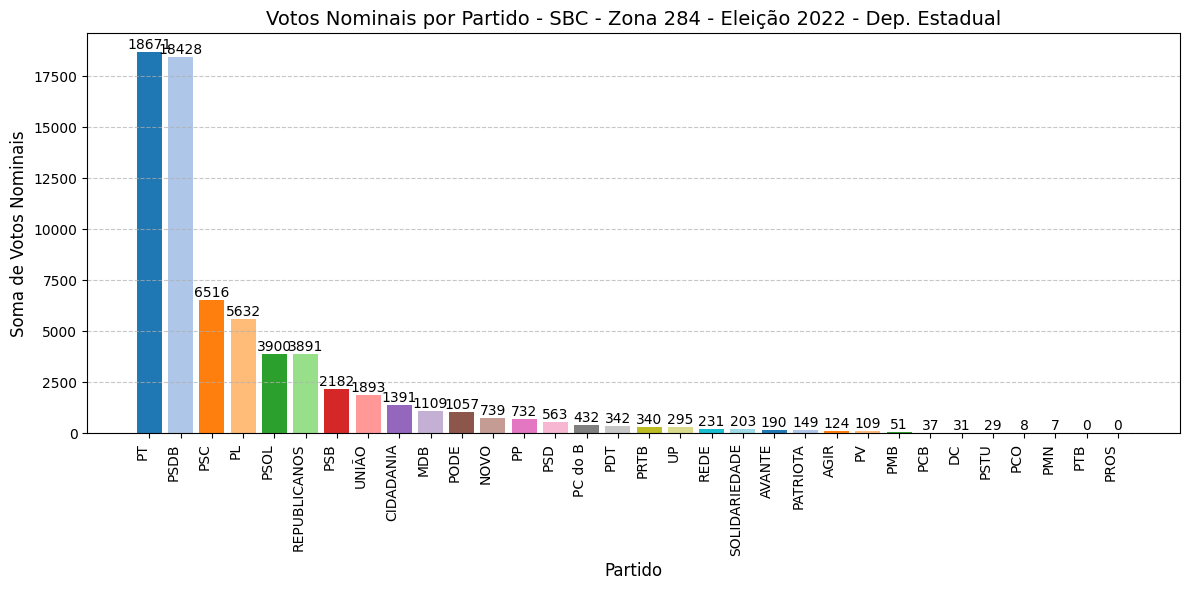

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

# Detecta a codificação
with open("/content/votacao_candidato_296.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

print(f"Codificação detectada: {result['encoding']}")

# Carrega o CSV com a codificação e o separador corretos
df_296 = pd.read_csv("/content/votacao_candidato_296.csv", encoding=result['encoding'], sep=";")

# Agrupa por partido e soma os votos nominais
df_agregado_296 = df_296.groupby('Partido')['Votos nominais'].sum().reset_index()

# Ordena os dados para o gráfico (opcional, mas recomendado)
df_agregado_296 = df_agregado_296.sort_values('Votos nominais', ascending=False)



# Cria o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(df_agregado_296['Partido'], df_agregado_296['Votos nominais'], color=plt.colormaps['tab20'].colors)

plt.xlabel('Partido', fontsize=12)
plt.ylabel('Soma de Votos Nominais', fontsize=12)
plt.title('Votos Nominais por Partido - SBC - Zona 284 - Eleição 2022 - Dep. Estadual', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}', ha='center', va='bottom')


plt.show()